<b> Problem Statement: Concrete Strength Prediction </b> <br>
Author: Balamurali Chandran <br><br>
Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable <br>
Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable <br>
Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable <br>
Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable <br>
Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable <br>
Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable<br> 
Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable <br>
Age(age) -- quantitative -- Day (1~365) -- Input Variable <br>
Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


##  <b><font color='red'>A. EDA</b>

### A. 1. Univariate Analysis

In [3]:
print('shape:',data.shape)
print(data.info())
data.describe().T

shape: (1030, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


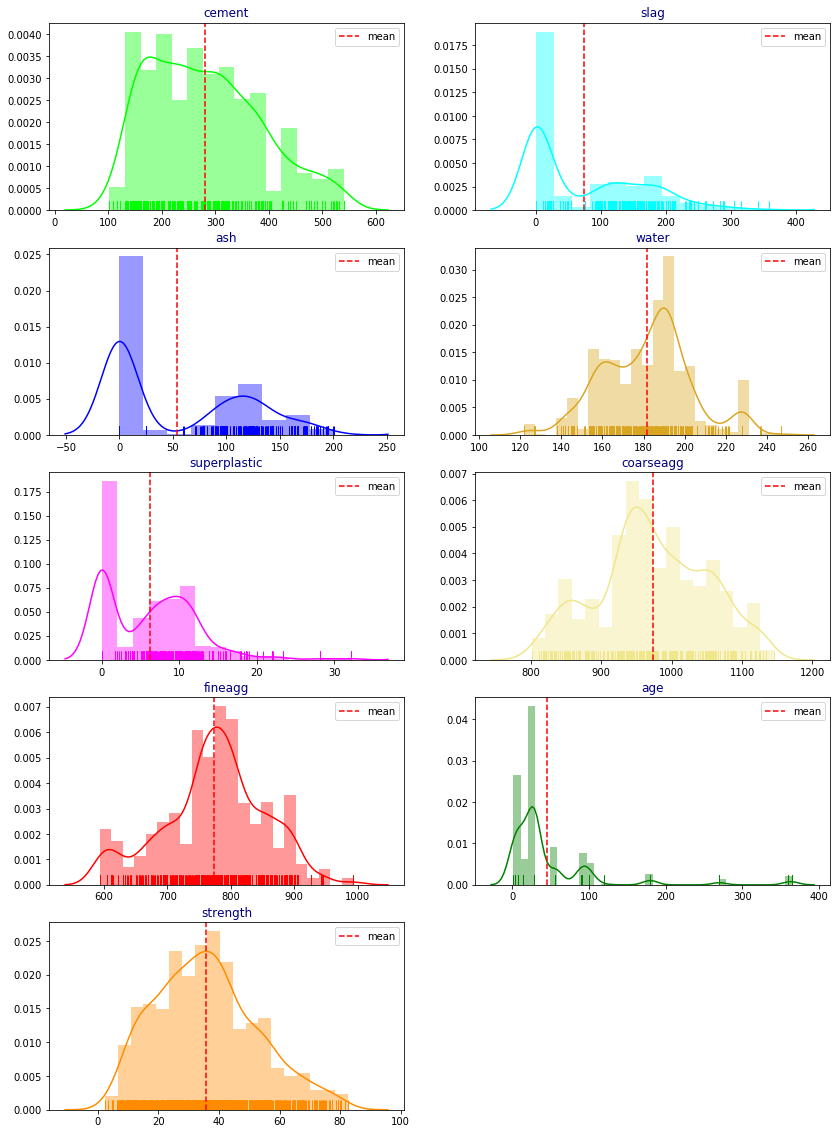

In [4]:
pred_columns=[i for i in data.columns ]
pred_columns
col_scheme=["lime","cyan","blue","goldenrod","magenta","khaki","red","green","darkorange"]
fig = plt.figure(figsize=(14,20))
for i,j,k in zip(pred_columns,range(len(pred_columns)),col_scheme):
    plt.subplot(5,2,j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color="r")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")


### A.2. Bi Variate Analysis

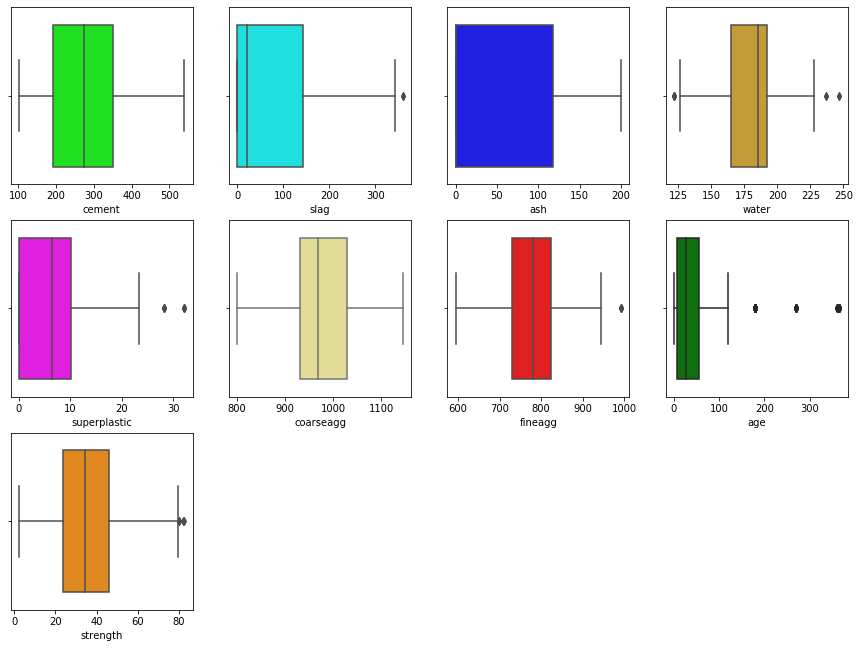

In [5]:
pred_columns=[i for i in data.columns ]
col_scheme=["lime","cyan","blue","goldenrod","magenta","khaki","red","green","darkorange"]
fig = plt.figure(figsize=(15,15))
for i,j,k in zip(pred_columns,range(len(pred_columns)),col_scheme):
    plt.subplot(4,4,j+1)
    ax=sns.boxplot(data[i],color=k)
    

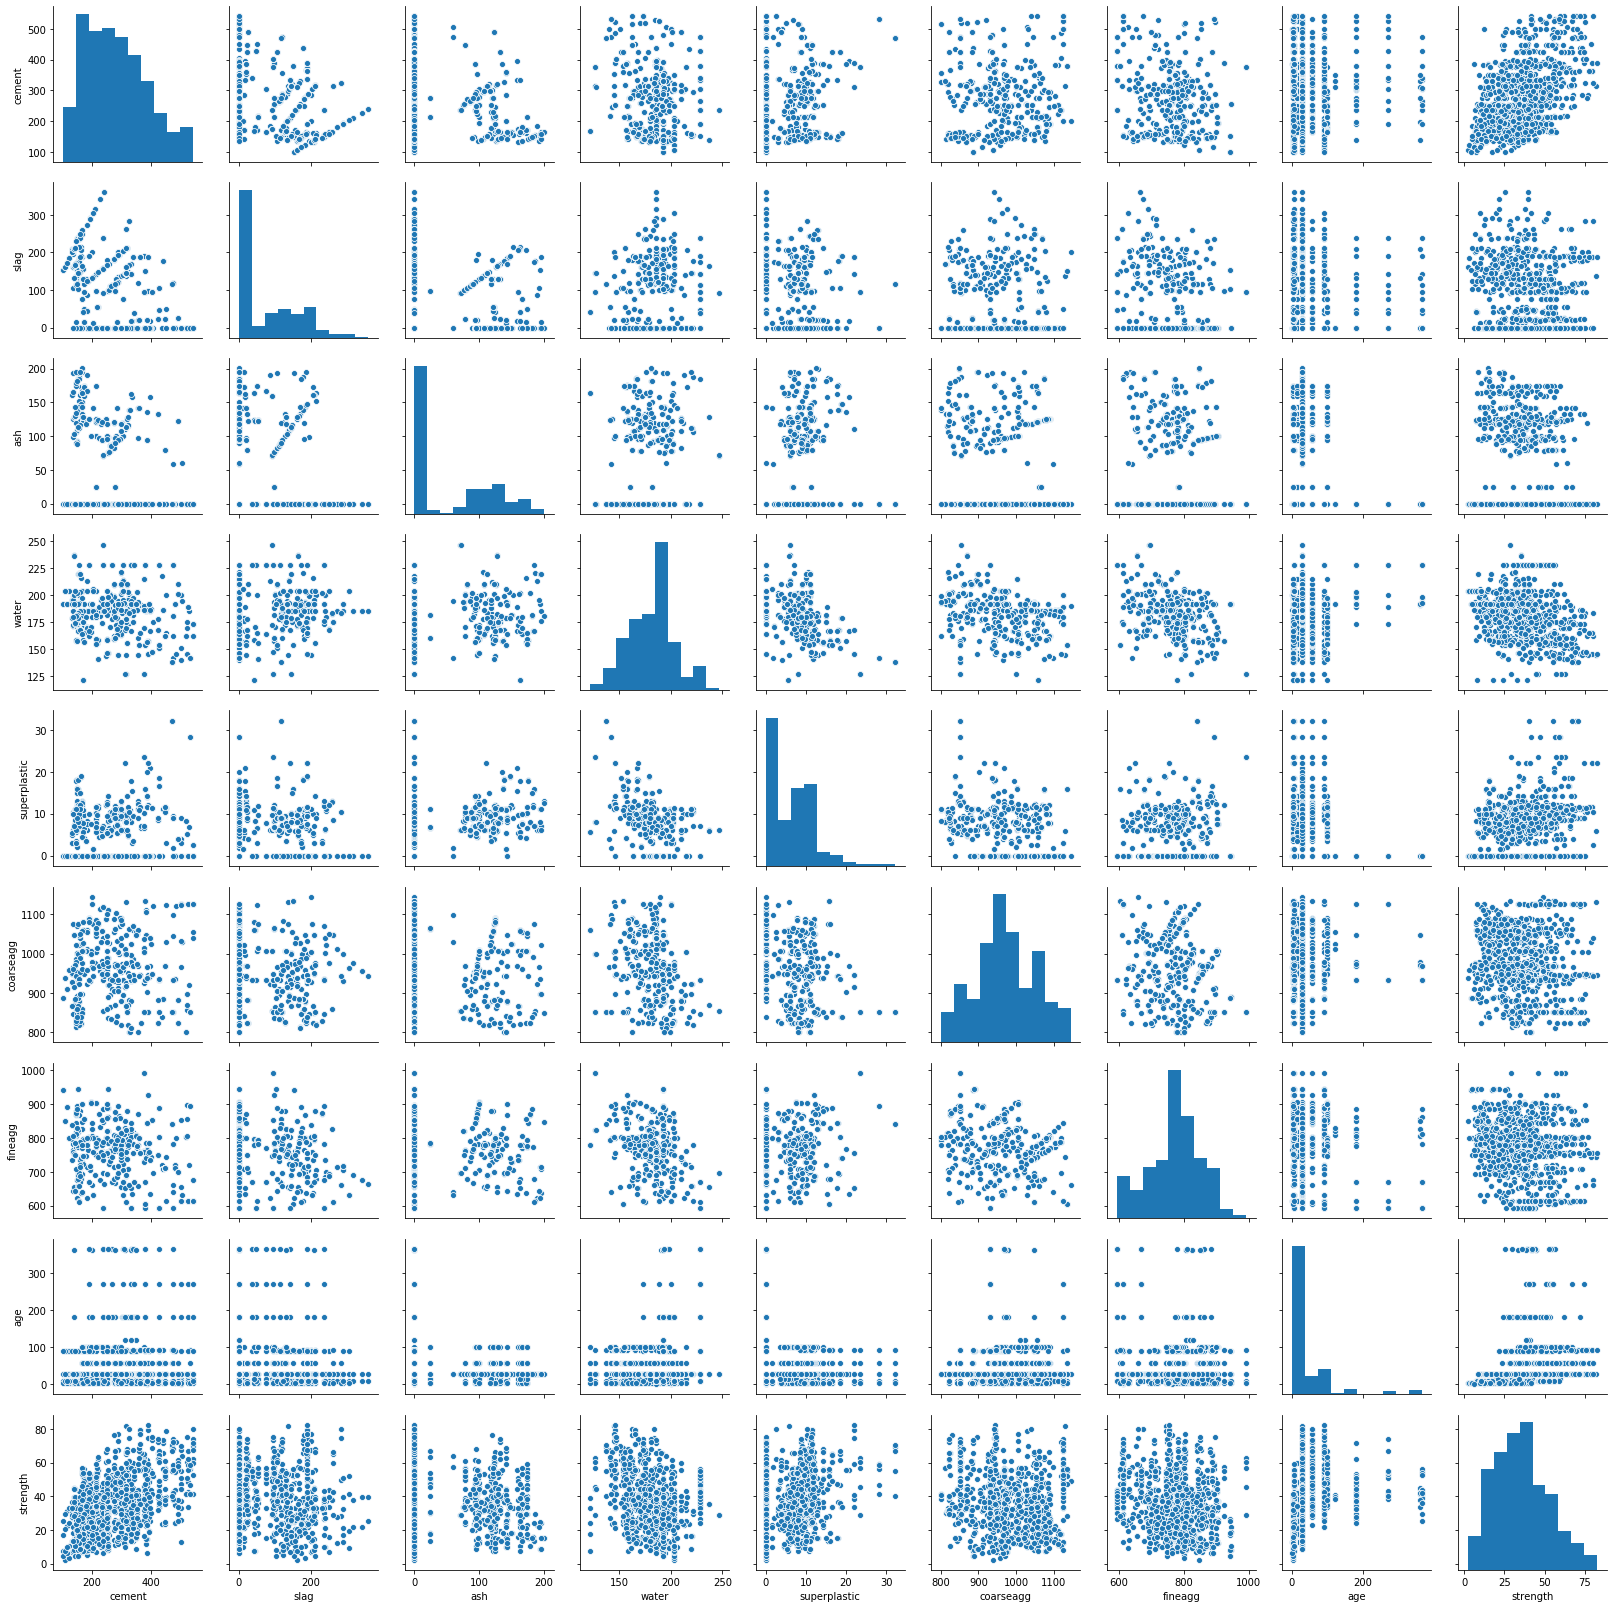

In [6]:
sns.pairplot(data)
plt.show()

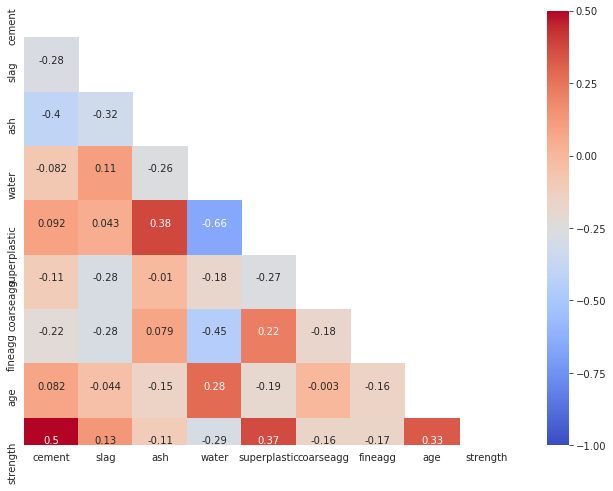

In [7]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
akws = {"ha": 'center',"va": 'bottom'}
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corr, mask=mask, vmin=-1,vmax=0.5, square=True,annot=True,annot_kws=akws,cmap='coolwarm')


<b><font color ='purple'> Inference of Bivariate Analysis from correlation matrix:</b> <br>
<p>Predictor Vs Target Correlations (blue <= -0.25 >= non-blue)</p>
         1. Cement + Stength has strong +ve correlation <br>
         2. Superplasticizer + Strength have good correlation <br>
         3. Age + Strength have good correlation<br>
         4. Slag + Strength have some correlation 
        
<p>Correlations between Predictors (atleast weak to medium) (blue <= -0.25 >= non-blue)</p>
     1. Cement + superplasticizer <br>
     2. Cement + Age <br>
     3. Water + Age <br>
     4. Superplasticizer + slag <br>
     5. Superplasticizer + ash <br>
     6. fineagg + superplasticizer <br>
     7. fineagg + ash
    
The negative correlations here is due to the variations in the quantity and its influence on the predictors.

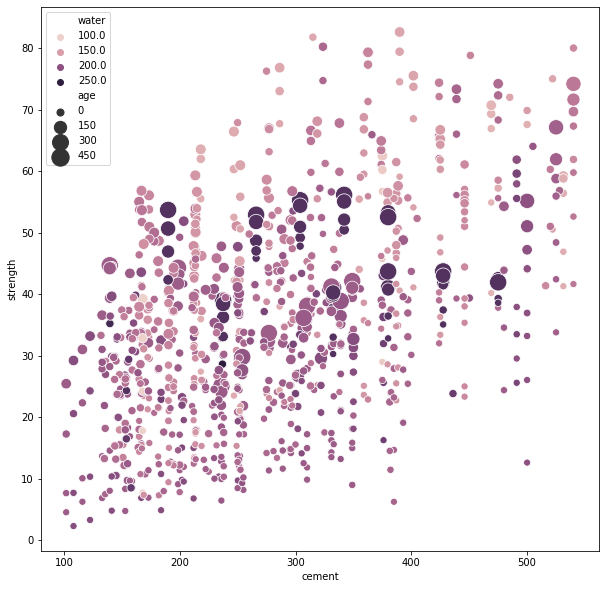

In [8]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(y="strength", x="cement", hue="water",size="age", data=data, sizes=(50, 300));

Pretty straight forward inference:-<br>
    1.Strength increases as the amount of cement increases, as the dots move up towards right on the x-axis.<br>
    2.Strength increases with age (as the size of dots represents the age), most of the time.<br>
    3.Cement with less age requires more cement for higher strength, as the smaller dots are moving up towards right on the x-axis.<br>
    4.The older the cement is the more water it requires, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.<br>
    5.Strength increases when less water is used in preparing it since the dots on the lower side of y-axis are darker and the dots on higher-end of y-axis are brighter.

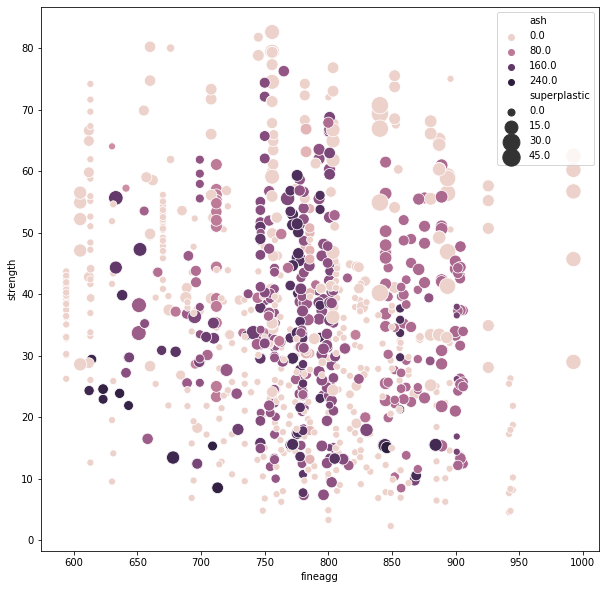

In [9]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(y="strength", x="fineagg", hue="ash",
   size="superplastic", data=data,  sizes=(50, 300))


    1. Strength decreases as ash increases, as darker dots are concentrated in the region representing low compressive strength.<br>
    2.Strength increases with superplastic since larger the dot the higher they are in the plot.<br>
    3. Strength increases when fineagg and superplastic increased with less ash.

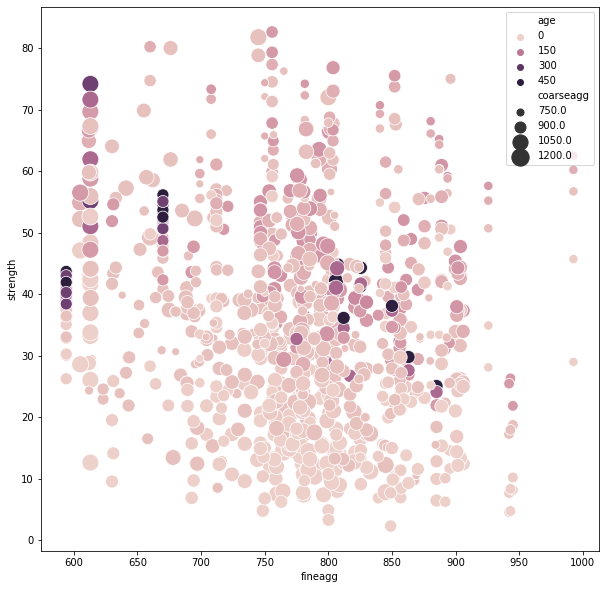

In [10]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(y="strength", x="fineagg", hue="age",
   size="coarseagg", data=data,  sizes=(50, 300));

1. fineagg and coarse agg are clustered around the lower middle and does not give a proper relationship - may be adequate amounts will give good strength with a medium level of age.


####  Outliers Before Treatment

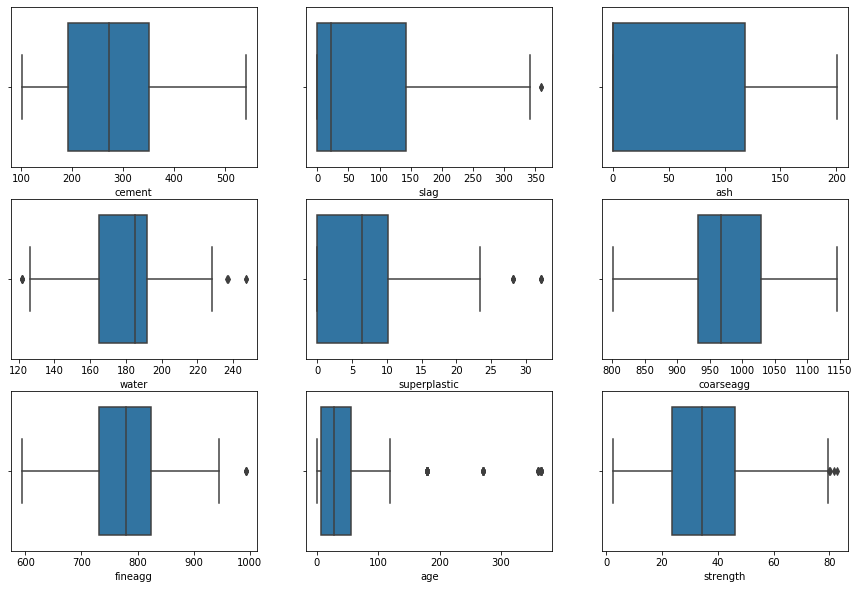

In [11]:
plt.figure(figsize=(15,10))
pos = 1
for i in data.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(data[i])
    pos += 1 

### A.3. Feature Engineering

##### A.3.a.There is no need for dropping features as the features have some role in determining strength and there is no redundancy of features. Also dimensionality reduction is not required as there are not much features

#### A.3.b. Splitting  the dataset

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
array= data.values
# X= array[:,0:7]
# Y=array[:,8]
X=data.drop(columns='strength')
Y=data.strength

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

y_val

554    27.66
176    10.03
648    39.42
69     49.80
337    76.80
       ...  
158    22.35
526    26.06
36     16.88
28     21.54
779    35.86
Name: strength, Length: 154, dtype: float64

In [13]:
# outlier treatment only for training set
for i in X_train.columns:
    q1,q2,q3=X_train[i].quantile([0.25,0.5,0.75])
    iqr=q3-q1
    a=X_train[i]> q3+1.5*iqr
    b=X_train[i]<q1-1.5*iqr
    X_train[i]=np.where(a|b,q2,X_train[i])

    

#### Outliers after treatment

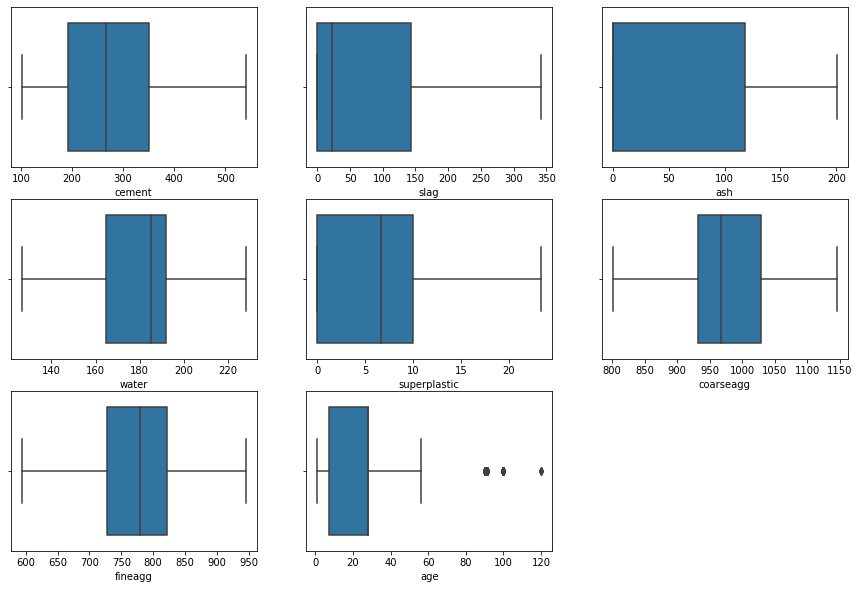

In [14]:
plt.figure(figsize=(15,10))
pos = 1
for i in X_train.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X_train[i])
    pos += 1 

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.metrics import accuracy_score

#### <b> A.3.c. Determination of models - simple or complex usual method without kfold</b>

#### Modelling on non-Scaled Dataset

In [16]:
def score_comparison_matrix(model,X_train,Y_train,X_test,Y_test):
    n_train=len(X_train)
    p_train=8
    
    n_test=len(X_test)
    p_test=8
    
    pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse=round(mean_squared_error(Y_test,y_pred),4)
    model_score_train=round(model.score(X_train,Y_train),4)
    
    # adjusted r2 sq. formula as no sklearn method available
    adj_r2_train=round(1-((1-model_score_train)*((n_train-1)/(n_train-p_train-1))),4) 
    
    # adjusted r2 sq. formula as no sklearn method available
    model_score_test=round(model.score(X_test,Y_test),4)
    
    adj_r2_test=round(1-((1-model_score_test)*((n_test-1)/(n_test-p_test-1))),4) 
    
    result=(mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test)
    return result

#### Linear model

In [17]:
lin_non_normal = make_pipeline(LinearRegression())
lin_non_normal.fit(X_train,Y_train)
Y_test.shape
res=score_comparison_matrix(lin_non_normal,X_train,Y_train,X_test,Y_test)

results_df=pd.DataFrame({'algorithm':'LinearRgression','parameter':['Null'],'mse':[res[0]],'train_score':[res[1]],'test_score':[res[2]],'adj_r2_train':[res[3]],'adj_r2_test':[res[4]]})
results_df


,algorithm,parameter,mse,train_score,test_score,adj_r2_train,adj_r2_test
0,LinearRgression,Null,294.7487,0.7278,-0.1358,0.7249,-0.1723


In [18]:
lin_normal = LinearRegression(normalize=True)
lin_normal.fit(X_train,Y_train)
res=score_comparison_matrix(lin_non_normal,X_train,Y_train,X_test,Y_test)
temp_df1=pd.DataFrame({'algorithm':'LinearRgression','parameter':['Normalize=True'],'mse':[res[0]],'train_score':[res[1]],'test_score':[res[2]],'adj_r2_train':[res[3]],'adj_r2_test':[res[4]]})
results_df=pd.concat([results_df,temp_df1])
results_df

,algorithm,parameter,mse,train_score,test_score,adj_r2_train,adj_r2_test
0,LinearRgression,Null,294.7487,0.7278,-0.1358,0.7249,-0.1723
0,LinearRgression,Normalize=True,294.7487,0.7278,-0.1358,0.7249,-0.1723


<b><font color="purple"> Important Inference: LinearRegression model tend to have no significance if "normalize parameter=True" is used</b>

#### Lasso & Ridge

In [19]:
pipe_lasso = make_pipeline(Lasso())
pipe_lasso.fit(X_train,Y_train)
res=score_comparison_matrix(pipe_lasso,X_train,Y_train,X_test,Y_test)
temp_df2=pd.DataFrame({'algorithm':'LinearRgression','parameter':['Lasso'],'mse':[res[0]],'train_score':[res[1]],'test_score':[res[2]],'adj_r2_train':[res[3]],'adj_r2_test':[res[4]]})
results_df=pd.concat([results_df,temp_df2])
results_df




,algorithm,parameter,mse,train_score,test_score,adj_r2_train,adj_r2_test
0,LinearRgression,Null,294.7487,0.7278,-0.1358,0.7249,-0.1723
0,LinearRgression,Normalize=True,294.7487,0.7278,-0.1358,0.7249,-0.1723
0,LinearRgression,Lasso,293.5765,0.7276,-0.1313,0.7247,-0.1676


In [20]:
pipe_ridge = make_pipeline(Ridge())
pipe_ridge.fit(X_train,Y_train)
temp_df3=pd.DataFrame({'algorithm':['Linear Regression- Ridge'],'parameter':[''],'mse':[res[0]],'train_score':[res[1]],'test_score':[res[2]],'adj_r2_train':[res[3]],'adj_r2_test':[res[4]]})
results_df=pd.concat([results_df,temp_df3])
results_df

,algorithm,parameter,mse,train_score,test_score,adj_r2_train,adj_r2_test
0,LinearRgression,Null,294.7487,0.7278,-0.1358,0.7249,-0.1723
0,LinearRgression,Normalize=True,294.7487,0.7278,-0.1358,0.7249,-0.1723
0,LinearRgression,Lasso,293.5765,0.7276,-0.1313,0.7247,-0.1676
0,Linear Regression- Ridge,,293.5765,0.7276,-0.1313,0.7247,-0.1676


#### Polynomial Model

In [21]:
degrees=[1,2,3,4,5,6,7,8,9]
for i in degrees:
    poly_model=make_pipeline(StandardScaler(),PolynomialFeatures(i),LinearRegression())
    poly_model.fit(X_train,Y_train)
    print('score scaled dataset with degrees of r2: {} on trained dataset : {:.2f}'.format(i,poly_model.score(X_train,Y_train)))
    print('score scaled dataset with degrees of r2: {} on test dataset:   {:.2f}'.format(i,poly_model.score(X_test,Y_test)))
    print('\n')


score scaled dataset with degrees of r2: 1 on trained dataset : 0.73
score scaled dataset with degrees of r2: 1 on test dataset:   -0.14


score scaled dataset with degrees of r2: 2 on trained dataset : 0.86
score scaled dataset with degrees of r2: 2 on test dataset:   -23.37


score scaled dataset with degrees of r2: 3 on trained dataset : 0.94
score scaled dataset with degrees of r2: 3 on test dataset:   -503.58


score scaled dataset with degrees of r2: 4 on trained dataset : 0.99
score scaled dataset with degrees of r2: 4 on test dataset:   -10109.92


score scaled dataset with degrees of r2: 5 on trained dataset : 0.99
score scaled dataset with degrees of r2: 5 on test dataset:   -557839078227661094912.00


score scaled dataset with degrees of r2: 6 on trained dataset : 1.00
score scaled dataset with degrees of r2: 6 on test dataset:   -211431677309302348225445888.00


score scaled dataset with degrees of r2: 7 on trained dataset : 1.00
score scaled dataset with degrees of r2: 7 o

<b><font color= 'purple'> Inference:   Complex  model is required as the scores are very low </b>

## <b> <font color= 'red'>B. Model Creation and Tuning</b>

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict

### B.1. a. Using Kfold

In [23]:
kfold=KFold(n_splits=10,random_state=45)
# Here the dataset for KFold is X_train
train_data=X_train.copy()
train_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
425,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91.0
398,266.0,112.0,87.0,178.0,10.0,910.0,745.0,28.0
631,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3.0
57,480.0,0.0,0.0,192.0,0.0,936.2,712.2,7.0
953,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,56.0


In [24]:
# combine X_train with label to get a training set(i.e 70% of the original data set split previously) for KFold manual split

train_data['strength']=Y_train
train_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
425,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91.0,74.19
398,266.0,112.0,87.0,178.0,10.0,910.0,745.0,28.0,39.42
631,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3.0,35.36
57,480.0,0.0,0.0,192.0,0.0,936.2,712.2,7.0,34.57
953,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,56.0,56.85


In [25]:
def kfold_split(train_data):
    for train_index, test_index in kfold.split(train_data):
         cv_train,cv_test=train_data.iloc[train_index],train_data.iloc[test_index]
         kfold_results =(cv_train,cv_test)
         return kfold_results
kfold_split(train_data)

(     cement   slag    ash  water  superplastic  coarseagg  fineagg    age  \
 181   359.0   19.0  141.0  154.0          10.9      942.0    801.0   28.0   
 304   152.6  238.7    0.0  200.0           6.3     1001.8    683.9   28.0   
 708   295.0    0.0    0.0  185.0           0.0     1069.0    769.0   28.0   
 133   236.0    0.0    0.0  193.0           0.0      968.0    885.0   28.0   
 875   279.8  128.9  100.4  172.4           9.5      825.1    804.9   28.0   
 ..      ...    ...    ...    ...           ...        ...      ...    ...   
 668   190.3    0.0  125.2  161.9           9.9     1088.1    802.6   14.0   
 338   143.7  170.2  132.6  191.6           8.5      814.1    805.3   28.0   
 941   214.9   53.8  121.9  155.6           9.6     1014.3    780.6  100.0   
 37    277.2   97.8   24.5  160.7          11.2     1061.7    782.5   14.0   
 876   158.4    0.0  194.9  219.7          11.0      897.7    712.9   28.0   
 
      strength  
 181     59.49  
 304     26.86  
 708     25

In [26]:
# parameters passed are the dataset from X_train [test datset remain untouched]
def score_comparison_matrix(model,X_train,Y_train,X_test,Y_test):
    n_train=len(X_train)
    p_train=8
    
    n_test=len(X_test)
    p_test=8
    
    result=[]
    pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse=round(mean_squared_error(Y_test,y_pred),4)
    model_score_train=round(model.score(X_train,Y_train),4)
    
    # adjusted r2 sq. formula as no sklearn method available
    adj_r2_train=round(1-((1-model_score_train)*((n_train-1)/(n_train-p_train-1))),4) 
    
    # adjusted r2 sq. formula as no sklearn method available
    model_score_test=round(model.score(X_test,Y_test),4)
    
    adj_r2_test=round(1-((1-model_score_test)*((n_test-1)/(n_test-p_test-1))),4) 
    
    result=(mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test)
    return result

In [27]:
#function to split for kfold data and pass the model to fit and return comparison matrix.
# train_data comes out of X_train
def kfold_split_fit(train_data,model):
    cv_train,cv_test = kfold_split(train_data)
    CVx_train =cv_train.drop(columns=['strength'])
    CVy_train =cv_train['strength']
    CVx_test =cv_test.drop(columns=['strength'])
    CVy_test =cv_test['strength']
    model.fit(CVx_train,CVy_train)
    res_df=score_comparison_matrix(model,CVx_train,CVy_train,CVx_test,CVy_test)
    return res_df

#### Decision Tree Regressor - with Kfold
parameters : criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)

In [28]:
dtree_reg=make_pipeline(DecisionTreeRegressor()) 

res_df=kfold_split_fit(train_data,dtree_reg)
temp_df4=pd.DataFrame({'algorithm':'DecisionTreeRgressor','parameter':['Default'],'mse':[res_df[0]],
                       'model_score_train':[res_df[1]],'model_score_test':[res_df[2]],
                       'adj_r2_train':[res_df[3]],'adj_r2_test':[res_df[4]]})
results_df=pd.concat([temp_df4])
results_df

,algorithm,parameter,mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test
0,DecisionTreeRgressor,Default,50.0059,0.9968,0.8324,0.9968,0.813


In [29]:
dtree_reg_p1=make_pipeline(DecisionTreeRegressor(max_depth=5,min_samples_split=3)) 


res_df=kfold_split_fit(train_data,dtree_reg_p1)
temp_df5=pd.DataFrame({'algorithm':'DecisionTreeRgressor','parameter':['max_depth=5,min_samples_split=3'],'mse':[res_df[0]],
                       'model_score_train':[res_df[1]],'model_score_test':[res_df[2]],
                       'adj_r2_train':[res_df[3]],'adj_r2_test':[res_df[4]]})
results_df=pd.concat([temp_df5,results_df])
results_df

,algorithm,parameter,mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test
0,DecisionTreeRgressor,"max_depth=5,min_samples_split=3",82.7101,0.8290,0.7228,0.8270,0.6907
0,DecisionTreeRgressor,Default,50.0059,0.9968,0.8324,0.9968,0.8130


In [30]:
dtree_reg_p2=make_pipeline(DecisionTreeRegressor(max_depth=2,min_samples_split=6)) 


res_df=kfold_split_fit(train_data,dtree_reg_p2)
temp_df6=pd.DataFrame({'algorithm':'DecisionTreeRgressor','parameter':['max_depth=2,min_samples_split=6'],'mse':[res_df[0]],
                       'model_score_train':[res_df[1]],'model_score_test':[res_df[2]],
                       'adj_r2_train':[res_df[3]],'adj_r2_test':[res_df[4]]})
results_df=pd.concat([temp_df6,results_df])
results_df

,algorithm,parameter,mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test
0,DecisionTreeRgressor,"max_depth=2,min_samples_split=6",148.2050,0.5187,0.5033,0.5131,0.4457
0,DecisionTreeRgressor,"max_depth=5,min_samples_split=3",82.7101,0.8290,0.7228,0.8270,0.6907
0,DecisionTreeRgressor,Default,50.0059,0.9968,0.8324,0.9968,0.8130


#### BaggingRegressor with kfold:
(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

In [31]:
bagg_reg=BaggingRegressor()
res_df=kfold_split_fit(train_data,bagg_reg)
temp_df7=pd.DataFrame({'algorithm':'BaggingRegressor','parameter':['Default'],'mse':[res_df[0]],
                       'model_score_train':[res_df[1]],'model_score_test':[res_df[2]],
                       'adj_r2_train':[res_df[3]],'adj_r2_test':[res_df[4]]})
results_df=pd.concat([temp_df7,results_df])
results_df

,algorithm,parameter,mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test
0,BaggingRegressor,Default,38.9351,0.9774,0.8695,0.9771,0.8544
0,DecisionTreeRgressor,"max_depth=2,min_samples_split=6",148.2050,0.5187,0.5033,0.5131,0.4457
0,DecisionTreeRgressor,"max_depth=5,min_samples_split=3",82.7101,0.8290,0.7228,0.8270,0.6907
0,DecisionTreeRgressor,Default,50.0059,0.9968,0.8324,0.9968,0.8130


In [32]:
bagg_reg_p1=BaggingRegressor(base_estimator=dtree_reg, n_estimators=10, max_samples=10, max_features=5)
res_df=kfold_split_fit(train_data,bagg_reg_p1)



temp_df8=pd.DataFrame({'algorithm':'BaggingRegressor','parameter':['base_estimator=dtree_reg, n_estimators=10, max_samples=10, max_features=5'],'mse':[res_df[0]],
                       'model_score_train':[res_df[1]],'model_score_test':[res_df[2]],
                       'adj_r2_train':[res_df[3]],'adj_r2_test':[res_df[4]]})
results_df=pd.concat([temp_df8,results_df])
results_df

,algorithm,parameter,mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",182.3660,0.3828,0.3888,0.3756,0.3179
0,BaggingRegressor,Default,38.9351,0.9774,0.8695,0.9771,0.8544
0,DecisionTreeRgressor,"max_depth=2,min_samples_split=6",148.2050,0.5187,0.5033,0.5131,0.4457
0,DecisionTreeRgressor,"max_depth=5,min_samples_split=3",82.7101,0.8290,0.7228,0.8270,0.6907
0,DecisionTreeRgressor,Default,50.0059,0.9968,0.8324,0.9968,0.8130


In [33]:
bagg_reg_p2=BaggingRegressor(base_estimator=dtree_reg, n_estimators=5, max_samples=10, max_features=8)
res_df=kfold_split_fit(train_data,bagg_reg_p2)

temp_df9=pd.DataFrame({'algorithm':'BaggingRegressor','parameter':['base_estimator=dtree_reg, n_estimators=5, max_samples=10, max_features=8'],'mse':[res_df[0]],
                       'model_score_train':[res_df[1]],'model_score_test':[res_df[2]],
                       'adj_r2_train':[res_df[3]],'adj_r2_test':[res_df[4]]})
results_df=pd.concat([temp_df9,results_df])
results_df



# results_bagg_p2=cross_val_score(bagg_reg,X,Y,cv=kfold)

# accuracy_score=round(results_bagg_p2.mean()*100,4)
# stand_dev=round(results_bagg_p2.std()*100,4)



,algorithm,parameter,mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=5, max_...",145.5759,0.4627,0.5121,0.4564,0.4555
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",182.3660,0.3828,0.3888,0.3756,0.3179
0,BaggingRegressor,Default,38.9351,0.9774,0.8695,0.9771,0.8544
0,DecisionTreeRgressor,"max_depth=2,min_samples_split=6",148.2050,0.5187,0.5033,0.5131,0.4457
0,DecisionTreeRgressor,"max_depth=5,min_samples_split=3",82.7101,0.8290,0.7228,0.8270,0.6907
0,DecisionTreeRgressor,Default,50.0059,0.9968,0.8324,0.9968,0.8130


#### GradientBoostingRegressor with kfold:
loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0

In [34]:
grad_reg=GradientBoostingRegressor()
res_df=kfold_split_fit(train_data,grad_reg)

temp_df10=pd.DataFrame({'algorithm':'GradientBoostingRegressor','parameter':['Default'],'mse':[res_df[0]],
                       'model_score_train':[res_df[1]],'model_score_test':[res_df[2]],
                       'adj_r2_train':[res_df[3]],'adj_r2_test':[res_df[4]]})
results_df=pd.concat([temp_df10,results_df])
results_df

# results_grad=cross_val_score(grad_reg,X,Y,cv=kfold)

# accuracy_score=round(results_grad.mean()*100,4)
# stand_dev=round(results_grad.std()*100,4)



,algorithm,parameter,mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test
0,GradientBoostingRegressor,Default,37.2862,0.9498,0.8750,0.9492,0.8605
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=5, max_...",145.5759,0.4627,0.5121,0.4564,0.4555
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",182.3660,0.3828,0.3888,0.3756,0.3179
0,BaggingRegressor,Default,38.9351,0.9774,0.8695,0.9771,0.8544
0,DecisionTreeRgressor,"max_depth=2,min_samples_split=6",148.2050,0.5187,0.5033,0.5131,0.4457
0,DecisionTreeRgressor,"max_depth=5,min_samples_split=3",82.7101,0.8290,0.7228,0.8270,0.6907
0,DecisionTreeRgressor,Default,50.0059,0.9968,0.8324,0.9968,0.8130


In [35]:
grad_reg_p1=GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,min_samples_split=5)
res_df=kfold_split_fit(train_data,grad_reg_p1)

temp_df11=pd.DataFrame({'algorithm':'GradientBoostingRegressor','parameter':['learning_rate=0.1, n_estimators=100,min_samples_split=5'],'mse':[res_df[0]],
                       'model_score_train':[res_df[1]],'model_score_test':[res_df[2]],
                       'adj_r2_train':[res_df[3]],'adj_r2_test':[res_df[4]]})
results_df=pd.concat([temp_df11,results_df])
results_df

,algorithm,parameter,mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test
0,GradientBoostingRegressor,"learning_rate=0.1, n_estimators=100,min_sample...",37.2847,0.9492,0.8750,0.9486,0.8605
0,GradientBoostingRegressor,Default,37.2862,0.9498,0.8750,0.9492,0.8605
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=5, max_...",145.5759,0.4627,0.5121,0.4564,0.4555
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",182.3660,0.3828,0.3888,0.3756,0.3179
0,BaggingRegressor,Default,38.9351,0.9774,0.8695,0.9771,0.8544
0,DecisionTreeRgressor,"max_depth=2,min_samples_split=6",148.2050,0.5187,0.5033,0.5131,0.4457
0,DecisionTreeRgressor,"max_depth=5,min_samples_split=3",82.7101,0.8290,0.7228,0.8270,0.6907
0,DecisionTreeRgressor,Default,50.0059,0.9968,0.8324,0.9968,0.8130


In [36]:
grad_reg_p2=GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,min_samples_split=5,max_depth=7)
res_df=kfold_split_fit(train_data,grad_reg_p2)

temp_df12=pd.DataFrame({'algorithm':'GradientBoostingRegressor','parameter':['learning_rate=0.1, n_estimators=100,min_samples_split=5,max_depth=7'],'mse':[res_df[0]],
                       'model_score_train':[res_df[1]],'model_score_test':[res_df[2]],
                       'adj_r2_train':[res_df[3]],'adj_r2_test':[res_df[4]]})
results_df=pd.concat([temp_df12,results_df])

# as depth incrases mean square error goes down and train score goes higher

<b><font color='purple'> B.1.a. Results : KFold Model Comparison</b>

<font color='purple' K Fold Model Comparison>

In [37]:

results_df

,algorithm,parameter,mse,model_score_train,model_score_test,adj_r2_train,adj_r2_test
0,GradientBoostingRegressor,"learning_rate=0.1, n_estimators=100,min_sample...",28.3794,0.9953,0.9049,0.9952,0.8939
0,GradientBoostingRegressor,"learning_rate=0.1, n_estimators=100,min_sample...",37.2847,0.9492,0.8750,0.9486,0.8605
0,GradientBoostingRegressor,Default,37.2862,0.9498,0.8750,0.9492,0.8605
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=5, max_...",145.5759,0.4627,0.5121,0.4564,0.4555
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",182.3660,0.3828,0.3888,0.3756,0.3179
0,BaggingRegressor,Default,38.9351,0.9774,0.8695,0.9771,0.8544
0,DecisionTreeRgressor,"max_depth=2,min_samples_split=6",148.2050,0.5187,0.5033,0.5131,0.4457
0,DecisionTreeRgressor,"max_depth=5,min_samples_split=3",82.7101,0.8290,0.7228,0.8270,0.6907
0,DecisionTreeRgressor,Default,50.0059,0.9968,0.8324,0.9968,0.8130


### B.1.b. Using Cross Validation

In [38]:
# dataset for alternate cross validation - test data set not used here
CVx_non_kfold=X_train.copy()
CVy_non_kfold=Y_train.copy()


#### DecisionTreeRegressor with cross validation:
(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

In [39]:
dtree_reg=make_pipeline(DecisionTreeRegressor()) 
results_dtree=cross_val_score(dtree_reg,CVx_non_kfold,CVy_non_kfold,cv=50) 

print("Accuracy:",results_dtree.mean()*100,results_dtree.std()*100)
accuracy_score=round(results_dtree.mean()*100,4)
stand_dev=round(results_dtree.std()*100,4)

temp_df1=pd.DataFrame({'algorithm':['DecisionTreeRegressor'],'parameter':['Default'],'mean_accuracy_score':[accuracy_score],'(+/-)standard_deviation':[stand_dev]})
resul_df=pd.concat([temp_df1])
resul_df


Accuracy: 72.8113408778928 43.4571961141565


,algorithm,parameter,mean_accuracy_score,(+/-)standard_deviation
0,DecisionTreeRegressor,Default,72.8113,43.4572


In [40]:
dtree_reg_p1=make_pipeline(DecisionTreeRegressor(max_depth=5,min_samples_split=3)) 
results_dtree_p1=cross_val_score(dtree_reg_p1,CVx_non_kfold,CVy_non_kfold,cv=50) 

print("Accuracy:",results_dtree_p1.mean()*100,results_dtree_p1.std()*100)
accuracy_score=round(results_dtree_p1.mean()*100,4)
stand_dev=round(results_dtree_p1.std()*100,4)

temp_df2=pd.DataFrame({'algorithm':['DecisionTreeRegressor'],'parameter':['max_depth=5,min_samples_split=3'],'mean_accuracy_score':[accuracy_score],'(+/-)standard_deviation':[stand_dev]})
resul_df=pd.concat([temp_df2,resul_df])
resul_df

Accuracy: 65.79278559495724 38.35995991204414


,algorithm,parameter,mean_accuracy_score,(+/-)standard_deviation
0,DecisionTreeRegressor,"max_depth=5,min_samples_split=3",65.7928,38.3600
0,DecisionTreeRegressor,Default,72.8113,43.4572


In [41]:
dtree_reg_p2=make_pipeline(DecisionTreeRegressor(max_depth=2,min_samples_split=6)) 
results_dtree_p2=cross_val_score(dtree_reg_p2,CVx_non_kfold,CVy_non_kfold,cv=50) 

print("Accuracy:",results_dtree_p2.mean()*100,results_dtree_p2.std()*100)
accuracy_score=round(results_dtree_p2.mean()*100,4)
stand_dev=round(results_dtree_p2.std()*100,4)

temp_df3=pd.DataFrame({'algorithm':['DecisionTreeRegressor'],'parameter':['max_depth=2,min_samples_split=6'],'mean_accuracy_score':[accuracy_score],'(+/-)standard_deviation':[stand_dev]})
resul_df=pd.concat([temp_df3,resul_df])
resul_df

Accuracy: 41.36542863214079 24.11386468286286


,algorithm,parameter,mean_accuracy_score,(+/-)standard_deviation
0,DecisionTreeRegressor,"max_depth=2,min_samples_split=6",41.3654,24.1139
0,DecisionTreeRegressor,"max_depth=5,min_samples_split=3",65.7928,38.3600
0,DecisionTreeRegressor,Default,72.8113,43.4572


#### BaggingRegressor with crossvalidation

In [42]:
bagg_reg=BaggingRegressor()
results_bagg=cross_val_score(bagg_reg,CVx_non_kfold,CVy_non_kfold,cv=50) 

print("Accuracy:",results_bagg.mean()*100,results_bagg.std()*100)
accuracy_score=round(results_bagg.mean()*100,4)
stand_dev=round(results_bagg.std()*100,4)

temp_df4=pd.DataFrame({'algorithm':['BaggingRegressor'],'parameter':['Default'],'mean_accuracy_score':[accuracy_score],'(+/-)standard_deviation':[stand_dev]})
resul_df=pd.concat([temp_df4,resul_df])
resul_df

Accuracy: 85.15052271912853 12.134745742060742


,algorithm,parameter,mean_accuracy_score,(+/-)standard_deviation
0,BaggingRegressor,Default,85.1505,12.1347
0,DecisionTreeRegressor,"max_depth=2,min_samples_split=6",41.3654,24.1139
0,DecisionTreeRegressor,"max_depth=5,min_samples_split=3",65.7928,38.3600
0,DecisionTreeRegressor,Default,72.8113,43.4572


In [43]:
bagg_reg_p1=BaggingRegressor(base_estimator=dtree_reg, n_estimators=10, max_samples=10, max_features=5)
results_bagg_p1=cross_val_score(bagg_reg_p1,CVx_non_kfold,CVy_non_kfold,cv=50) 

print("Accuracy:",results_bagg_p1.mean()*100,results_bagg_p1.std()*100)
accuracy_score=round(results_bagg_p1.mean()*100,4)
stand_dev=round(results_bagg_p1.std()*100,4)

temp_df5=pd.DataFrame({'algorithm':['BaggingRegressor'],'parameter':['base_estimator=dtree_reg, n_estimators=10, max_samples=10, max_features=5'],'mean_accuracy_score':[accuracy_score],'(+/-)standard_deviation':[stand_dev]})
resul_df=pd.concat([temp_df5,resul_df])
resul_df

Accuracy: 27.342889455182366 22.175314948130083


,algorithm,parameter,mean_accuracy_score,(+/-)standard_deviation
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",27.3429,22.1753
0,BaggingRegressor,Default,85.1505,12.1347
0,DecisionTreeRegressor,"max_depth=2,min_samples_split=6",41.3654,24.1139
0,DecisionTreeRegressor,"max_depth=5,min_samples_split=3",65.7928,38.3600
0,DecisionTreeRegressor,Default,72.8113,43.4572


In [44]:
bagg_reg_p2=BaggingRegressor( base_estimator=dtree_reg,n_estimators=10, max_samples=10, max_features=8)
results_bagg_p2=cross_val_score(bagg_reg_p2,CVx_non_kfold,CVy_non_kfold,cv=50) 

print("Accuracy:",results_bagg_p2.mean()*100,results_bagg_p2.std()*100)
accuracy_score=round(results_bagg_p2.mean()*100,4)
stand_dev=round(results_bagg_p2.std()*100,4)

temp_df6=pd.DataFrame({'algorithm':['BaggingRegressor'],'parameter':['base_estimator=dtree_reg, n_estimators=10, max_samples=10, max_features=5'],'mean_accuracy_score':[accuracy_score],'(+/-)standard_deviation':[stand_dev]})
resul_df=pd.concat([temp_df6,resul_df])
resul_df

Accuracy: 35.098525244852205 27.530727927283394


,algorithm,parameter,mean_accuracy_score,(+/-)standard_deviation
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",35.0985,27.5307
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",27.3429,22.1753
0,BaggingRegressor,Default,85.1505,12.1347
0,DecisionTreeRegressor,"max_depth=2,min_samples_split=6",41.3654,24.1139
0,DecisionTreeRegressor,"max_depth=5,min_samples_split=3",65.7928,38.3600
0,DecisionTreeRegressor,Default,72.8113,43.4572


#### GradientBoostingRegressor with cross validation:
loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0

In [45]:
grad_reg=GradientBoostingRegressor()
results_grad=cross_val_score(grad_reg,CVx_non_kfold,CVy_non_kfold,cv=50) 

print("Accuracy:",results_grad.mean()*100,results_grad.std()*100)
accuracy_score=round(results_grad.mean()*100,4)
stand_dev=round(results_grad.std()*100,4)

temp_df7=pd.DataFrame({'algorithm':['GradientBoostingRegressor'],'parameter':['Default'],'mean_accuracy_score':[accuracy_score],'(+/-)standard_deviation':[stand_dev]})
resul_df=pd.concat([temp_df7,resul_df])
resul_df

Accuracy: 86.60855173445889 11.887965379573581


,algorithm,parameter,mean_accuracy_score,(+/-)standard_deviation
0,GradientBoostingRegressor,Default,86.6086,11.8880
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",35.0985,27.5307
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",27.3429,22.1753
0,BaggingRegressor,Default,85.1505,12.1347
0,DecisionTreeRegressor,"max_depth=2,min_samples_split=6",41.3654,24.1139
0,DecisionTreeRegressor,"max_depth=5,min_samples_split=3",65.7928,38.3600
0,DecisionTreeRegressor,Default,72.8113,43.4572


In [46]:
grad_reg_p1=GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,min_samples_split=5)
results_grad_p1=cross_val_score(grad_reg_p1,CVx_non_kfold,CVy_non_kfold,cv=50) 

print("Accuracy:",results_grad_p1.mean()*100,results_grad_p1.std()*100)
accuracy_score=round(results_grad_p1.mean()*100,4)
stand_dev=round(results_grad_p1.std()*100,4)

temp_df8=pd.DataFrame({'algorithm':['GradientBoostingRegressor'],'parameter':['learning_rate=0.1, n_estimators=100,min_samples_split=5'],'mean_accuracy_score':[accuracy_score],'(+/-)standard_deviation':[stand_dev]})
resul_df=pd.concat([temp_df8,resul_df])
resul_df

Accuracy: 86.6376975525874 11.55489181990778


,algorithm,parameter,mean_accuracy_score,(+/-)standard_deviation
0,GradientBoostingRegressor,"learning_rate=0.1, n_estimators=100,min_sample...",86.6377,11.5549
0,GradientBoostingRegressor,Default,86.6086,11.8880
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",35.0985,27.5307
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",27.3429,22.1753
0,BaggingRegressor,Default,85.1505,12.1347
0,DecisionTreeRegressor,"max_depth=2,min_samples_split=6",41.3654,24.1139
0,DecisionTreeRegressor,"max_depth=5,min_samples_split=3",65.7928,38.3600
0,DecisionTreeRegressor,Default,72.8113,43.4572


In [47]:
grad_reg_p2=GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,min_samples_split=5,max_depth=7)
results_grad_p2=cross_val_score(grad_reg_p2,CVx_non_kfold,CVy_non_kfold,cv=50) 

accuracy_score=round(results_grad_p2.mean()*100,4)
stand_dev=round(results_grad_p2.std()*100,4)

temp_df9=pd.DataFrame({'algorithm':['GradientBoostingRegressor'],'parameter':['learning_rate=0.1, n_estimators=100,min_samples_split=5,max_depth=7'],'mean_accuracy_score':[accuracy_score],'(+/-)standard_deviation':[stand_dev]})
resul_df=pd.concat([temp_df9,resul_df])


<b><font color='purple'> B.1.b. Results : Crossvalidation Model Comparison</b>

In [48]:
resul_df

,algorithm,parameter,mean_accuracy_score,(+/-)standard_deviation
0,GradientBoostingRegressor,"learning_rate=0.1, n_estimators=100,min_sample...",88.6174,10.7024
0,GradientBoostingRegressor,"learning_rate=0.1, n_estimators=100,min_sample...",86.6377,11.5549
0,GradientBoostingRegressor,Default,86.6086,11.8880
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",35.0985,27.5307
0,BaggingRegressor,"base_estimator=dtree_reg, n_estimators=10, max...",27.3429,22.1753
0,BaggingRegressor,Default,85.1505,12.1347
0,DecisionTreeRegressor,"max_depth=2,min_samples_split=6",41.3654,24.1139
0,DecisionTreeRegressor,"max_depth=5,min_samples_split=3",65.7928,38.3600
0,DecisionTreeRegressor,Default,72.8113,43.4572


<b><font color='purple'> Inference: </b> <br>
The model performance done on KFold and non-Kfold indicates that:<br>
 1. K-Fold modelling gave the thrid GradientBoostingRegressor with least mean square error of about 23 have realtively same r2 and adjusted r2.And also BaggingRegressor the simple one ( first iteration) relatively has low mean square error and good training and validation-test scores (B.1.a.Results matrix)<br>
 2. Non-KFold modelling also suggest third GradientBoosting Regressor and default BaggingRegressor gave good accuracy    scores.(B.1.b.Results)<br>
   

### B.2. Model Tuning for GradientBoosting Regressor and BaggingRegressor with Random Search

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# for model tuning for training
variables=X_train.copy()
label=Y_train.copy()
#for testing validation data set is used
x_val,y_val

(     cement   slag    ash  water  superplastic  coarseagg  fineagg  age
 554   233.8    0.0   94.6  197.9           4.6      947.0    852.2   56
 176   230.0    0.0  118.3  195.5           4.6     1029.4    758.6    3
 648   266.2  112.3   87.5  177.9          10.4      909.7    744.5   28
 69    323.7  282.8    0.0  183.8          10.3      942.7    659.9    7
 337   286.3  200.9    0.0  144.7          11.2     1004.6    803.7   91
 ..      ...    ...    ...    ...           ...        ...      ...  ...
 158   116.0  173.0    0.0  192.0           0.0      909.8    891.9   28
 526   500.0    0.0    0.0  200.0           0.0     1125.0    613.0    3
 36    165.0    0.0  143.6  163.8           0.0     1005.6    900.9   14
 28    166.1    0.0  163.3  176.5           4.5     1058.6    780.1   28
 779   298.0    0.0  107.0  164.0          13.0      953.0    784.0   28
 
 [154 rows x 8 columns], 554    27.66
 176    10.03
 648    39.42
 69     49.80
 337    76.80
        ...  
 158    22.35


<b> <font color='blue'> BaggingRegressor on RamdomizedSearch</b>

In [51]:
param_dist={'base_estimator':[None,dtree_reg], 'n_estimators':[10,20,30,40,60,80,100], 'max_samples':[10,20,40,60,80,100,200], 'max_features':[2,4,6,8], 
'bootstrap':[True], 'bootstrap_features':[True,False],
'oob_score':[True,False], 'warm_start':[False], 'n_jobs':[None], 'random_state':[10,20,40,50], 'verbose':[0]}

bagg_reg=BaggingRegressor()
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(bagg_reg,param_distributions=param_dist,  n_iter=samples,cv=kfold) 
randomCV.fit(variables, label)
print('best parameters:',randomCV.best_params_)
print("score:",randomCV.best_score_)

best parameters: {'warm_start': False, 'verbose': 0, 'random_state': 10, 'oob_score': False, 'n_jobs': None, 'n_estimators': 20, 'max_samples': 200, 'max_features': 6, 'bootstrap_features': True, 'bootstrap': True, 'base_estimator': Pipeline(memory=None,
         steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='mse', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'))],
         verbose=False)}
score: 0.7787808456205483


In [52]:
# pick the best parameters and fit and then score on validation set
bagg_reg_optimised=BaggingRegressor(**randomCV.best_params_)
bagg_reg_optimised.fit(variables,label)

train_score=bagg_reg_optimised.score(variables,label)
validation_score=bagg_reg_optimised.score(x_val,y_val) # validation dataset comes into play
          

In [53]:
#Score & predict in the test
y_predict=bagg_reg_optimised.predict(X_test)
test_score=bagg_reg_optimised.score(X_test,Y_test)
print('score for best BaggingRegressor:',round(test_score,4))

score for best BaggingRegressor: 0.7325


In [54]:
temp_df=pd.DataFrame({'algorithm':['BaggingRegressor'],'training_score':[train_score],'validation_score':[validation_score],
                      'test_score':[test_score],'best_score':[randomCV.best_score_],'(+/-)standard_dev_score':[randomCV.cv_results_['std_test_score'][randomCV.best_index_]]})
temp_df

,algorithm,training_score,validation_score,test_score,best_score,(+/-)standard_dev_score
0,BaggingRegressor,0.861118,0.728909,0.732471,0.778781,0.039138


<b><font color='blue'> GradientBoostingRegressor on RandomizedSearch</b>


In [55]:
param_dist={'loss':['ls', 'lad', 'huber', 'quantile'], 'learning_rate':[0.1,0.2,0.5], 'n_estimators':[10,20,40,60,80,100,200,400], 'subsample':[1.0], 
'criterion':['friedman_mse','mse'], 'min_samples_split':[2,4,5,6,8], 'min_samples_leaf':[1,2,5,6],
'min_weight_fraction_leaf':[0.0], 'max_depth':[2,4,6,8,7,10,None], 'min_impurity_decrease':[0.0],
'min_impurity_split':[None], 'init':[None], 'random_state':[10],'max_features':[2,4,6,8], 'alpha':[0.9],
'verbose':[0], 'max_leaf_nodes':[None], 'warm_start':[False,True]}

grad_reg=GradientBoostingRegressor()
samples = 10  # number of random samples 
random_grad_CV = RandomizedSearchCV(grad_reg, param_distributions=param_dist, n_iter=samples,cv=kfold) 
random_grad_CV.fit(variables, label)
print("score:",random_grad_CV.best_score_)
random_grad_CV.best_params_

score: 0.915454326914596


{'warm_start': False,
 'verbose': 0,
 'subsample': 1.0,
 'random_state': 10,
 'n_estimators': 400,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'min_impurity_split': None,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': None,
 'max_features': 2,
 'max_depth': None,
 'loss': 'ls',
 'learning_rate': 0.2,
 'init': None,
 'criterion': 'friedman_mse',
 'alpha': 0.9}

In [56]:
random_grad_CV_optimised= GradientBoostingRegressor(**random_grad_CV.best_params_) # passing the best parameters
random_grad_CV_optimised.fit(variables,label)
train_score_gr=random_grad_CV_optimised.score(variables,label)
validation_score_gr=random_grad_CV_optimised.score(x_val,y_val) # validation dataset comes into play
print(train_score_gr,validation_score_gr)


0.9959738161823081 0.8668995661131729


In [57]:
#Score & predict in the test
y_predict=random_grad_CV_optimised.predict(X_test)
test_score=random_grad_CV_optimised.score(X_test,Y_test)
print('score for best GradientBoostingRegressor:',round(test_score,4))

score for best GradientBoostingRegressor: 0.8769


In [58]:
temp_df2=pd.DataFrame({'algorithm':['GradientBoostingRegressor'],'training_score':[train_score_gr],'validation_score':[validation_score_gr],
                      'test_score':[test_score],'best_score':[random_grad_CV.best_score_],'(+/-)standard_dev_score':[random_grad_CV.cv_results_['std_test_score'][random_grad_CV.best_index_]]})
temp_df=pd.concat([temp_df,temp_df2])
temp_df

,algorithm,training_score,validation_score,test_score,best_score,(+/-)standard_dev_score
0,BaggingRegressor,0.861118,0.728909,0.732471,0.778781,0.039138
0,GradientBoostingRegressor,0.995974,0.866900,0.876929,0.915454,0.024500


## B.3. Model Performance Range at 95% confidence interval or 2 standard deviation

In [59]:
temp_df

,algorithm,training_score,validation_score,test_score,best_score,(+/-)standard_dev_score
0,BaggingRegressor,0.861118,0.728909,0.732471,0.778781,0.039138
0,GradientBoostingRegressor,0.995974,0.866900,0.876929,0.915454,0.024500
